# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [148]:
import pandas as pd
import numpy as np
from datetime import datetime, date 
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [66]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, 
                   na_values= ['Unknown', 'UNKNOWN', 'Dog Name Not Provided', 'no name'])
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29417 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3974 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

##### Each row is a licensed dog in NYC as of April 2016

##### `Owner Zip Code` is the NYC zipcode of the owner of the dog

##### `Vaccinated` is whether or not the dog is vaccinated


# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

##### Q1. What is the most popular dog breed by neighbourhood?
##### Q2. Is there a preference for pure breeds in certain neighbourhoods compared to others? (checked by absence of a secondary breed)

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

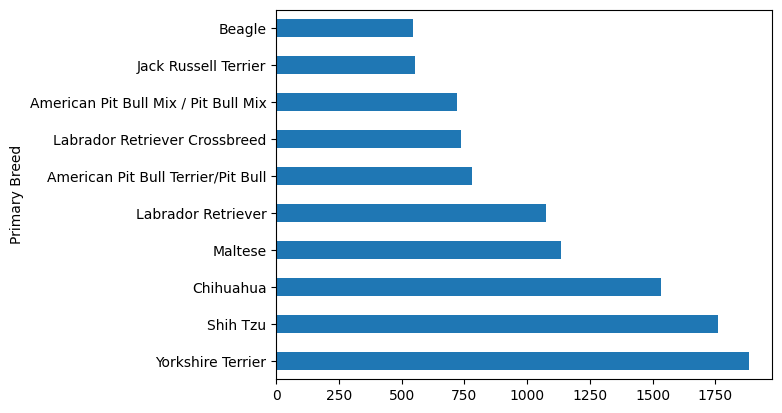

In [15]:
df.value_counts('Primary Breed').head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [17]:
# I reran the whole thing by categorising 'Unknown' as Nan so I dont get 'Unknown' here.

## What are the most popular dog names?

In [30]:
df.value_counts('Animal Name').head(50)

Animal Name
Max         202
Bella       193
Charlie     172
Lola        146
Rocky       140
Lucy        128
Coco        114
Buddy       113
Lucky       106
Daisy        90
Lily         88
Princess     86
Bailey       83
Luna         81
Molly        81
Toby         79
Oliver       79
Chloe        78
Teddy        76
Sophie       75
Stella       74
unknown      71
Milo         68
Riley        64
Cooper       63
Penny        63
Ruby         63
Jack         61
Zoe          60
Oreo         60
Ginger       60
Oscar        59
Maggie       59
No Name      55
Sadie        54
Gizmo        53
Sammy        51
Leo          51
Bruno        50
Sasha        50
Pepper       50
Cody         49
Cookie       47
Rosie        47
Buster       45
Shadow       44
Zoey         44
Winston      44
Lulu         44
MAX          43
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [37]:
# counting all 'Max'-like dog names

df[df['Animal Name'].str.contains("MAX", na = False, case=False)]['Animal Name'].value_counts()

Animal Name
Max            202
MAX             43
Maximus         27
MAX             19
max             11
              ... 
Max Brewer       1
maximus          1
max torres       1
maximillion      1
Maximillan       1
Name: count, Length: 133, dtype: int64

In [44]:
# countings dogs with name Max (ignoring the case)
df[df['Animal Name'].str.upper() == "MAX"]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
42,10023,Max,M,"Dachshund, Long Haired",NaN,Rust,NaN,NaN,2005-10-01,Yes,NaN,Yes,2014-09-14 21:58:06.647,2014-09-14,2019-09-14
53,10029,Max,M,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,WHITE,NaN,2008-01-01,Yes,No,Yes,2014-09-15 11:57:08.213,2014-09-15,2017-10-24
128,11218,Max,M,NaN,Maltese Mix,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2014-09-19 12:28:04.970,2014-09-19,2017-10-25
174,11361,Max,M,West High White Terrier,NaN,WHITE,NaN,NaN,2005-12-01,Yes,No,Yes,2014-09-22 19:17:36.487,2014-09-22,2016-09-24
425,10075,Max,M,NaN,Dachshund,BRINDLE,NaN,NaN,2012-04-01,Yes,No,Yes,2014-10-11 14:45:43.860,2014-10-11,2016-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29610,11206,MAX,M,"Bull Dog, French",NaN,BLACK,WHITE,NaN,2006-05-01,No,No,Yes,2015-08-20 15:55:16.537,2015-08-20,2016-09-30
29762,10306,Max,M,German Shepherd Crossbreed,NaN,Brindle,Brown,Tan,2003-02-01,Yes,NaN,Yes,2015-08-21 13:55:14.587,2015-08-21,2016-08-21
29877,11218,MAX,M,German Shepherd Dog,NaN,Black,Tan,NaN,2004-12-01,No,NaN,Yes,2015-08-22 11:01:32.423,2015-08-22,2016-08-22
29887,10035,Max,M,Shih Tzu,NaN,WHITE,GOLD,NaN,2011-02-01,No,No,Yes,2015-08-22 12:01:52.387,2015-08-22,2016-08-07


In [49]:
# countings dogs with name Maxwell (ignoring the case)
df[df['Animal Name'].str.upper() == "MAXWELL"]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
1433,10012,Maxwell,M,Cocker Spaniel,NaN,White,Gray,Black,2014-01-01,Yes,NaN,Yes,2014-12-21 10:32:07.560,2014-12-21,2019-12-21
4045,11236,Maxwell,M,Maltese,NaN,WHITE,NaN,NaN,2012-11-01,No,No,Yes,2015-04-20 16:04:48.143,2015-04-20,2016-05-10
8430,11214,MAXWELL,F,Dachshund Smooth Coat,NaN,BLACK,TAN,NaN,2009-08-01,Yes,No,Yes,2015-05-21 12:38:31.993,2015-05-21,2016-05-23
10464,11354,MAXWELL,M,Labrador Retriever,NaN,Brown,NaN,NaN,2013-04-01,Yes,NaN,Yes,2015-06-03 10:13:37.363,2015-06-03,2016-06-03
11989,11417,Maxwell,M,Maltese,NaN,White,NaN,NaN,2008-12-01,Yes,NaN,Yes,2015-06-10 20:33:47.387,2015-06-10,2016-06-10
17922,10310,Maxwell,M,Basset Hound,NaN,Black,White,NaN,2015-04-01,Yes,NaN,No,2015-07-03 12:02:52.947,2015-07-03,2016-07-03
20307,10303,Maxwell,M,Bichon Frise,NaN,TAN,WHITE,NaN,2013-01-01,Yes,No,Yes,2015-07-14 16:35:35.347,2015-07-14,2016-08-01
22178,10028,Maxwell,M,Bassett Hound,NaN,RED,WHITE,NaN,2014-02-01,Yes,No,Yes,2015-07-23 10:13:49.767,2015-07-23,2016-09-01
22459,11203,Maxwell,M,Shih Tzu,NaN,Gray,White,Brown,2012-10-01,No,NaN,Yes,2015-07-24 00:41:46.147,2015-07-24,2016-10-09
26767,10005,Maxwell,M,Beagle,NaN,Brown,White,Black,2006-05-01,Yes,NaN,Yes,2015-08-11 12:39:28.373,2015-08-11,2016-08-11


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [54]:
df['Guard or Trained'].value_counts(normalize = True).mul(100).round(2)

Guard or Trained
No     99.91
Yes     0.09
Name: proportion, dtype: float64

## What are the actual numbers?

In [55]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [56]:
df['Guard or Trained'].value_counts(dropna = False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [61]:
df['Guard or Trained'].fillna("No", inplace=True)

In [62]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [63]:
df[df['Guard or Trained']== "Yes"].value_counts('Primary Breed')

Primary Breed
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
Poodle, Standard              1
Rottweiler                    1
Schnauzer, Miniature          1
Shih Tzu                      1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [74]:
df['birth_year']=df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,birth_year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,2023
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,2023
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2023
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,2023
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2023


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [78]:
df['age'] = date.today().year - df['birth_year']
df['age'].median()

13.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [85]:
df_zip = pd.read_csv('zipcodes-neighborhoods.csv')
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  178 non-null    object
 1   zip           178 non-null    int64 
 2   borough       178 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [84]:
df_merged = df.merge(df_zip, left_on='Owner Zip Code', right_on='zip', how='left')
df_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,birth_year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,10,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,9,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,15,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,9,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [98]:
# Bronx
df_merged[df_merged['borough'] == 'Bronx']['Animal Name'].value_counts()

Animal Name
Bella                   22
Max                     21
Rocky                   20
Lucky                   15
Princess                15
                        ..
BAILEY                   1
Spice Shiloh Carwell     1
Jackie E.                1
SIMONA                   1
toby                     1
Name: count, Length: 2028, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [99]:
# Brooklyn
df_merged[df_merged['borough'] == 'Brooklyn']['Animal Name'].value_counts()

Animal Name
Max          46
Bella        45
unknown      45
Charlie      42
Rocky        36
             ..
EMMIE         1
Jimmi         1
Clifford      1
Amanda        1
Beckett       1
Name: count, Length: 4535, dtype: int64

In [100]:
# Upper West Side

df_merged[df_merged['neighborhood'] == 'Upper West Side']['Animal Name'].value_counts()

Animal Name
Lola       17
Lucy       16
Charlie    12
Lily       11
Cooper     11
           ..
Lenny       1
GORDON      1
JENNY       1
Tobi        1
Bu Chi      1
Name: count, Length: 1451, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [104]:
df_merged[df_merged['Spayed or Neut'] == 'Yes']['Primary Breed'].value_counts(normalize = True).mul(100).head(10)

Primary Breed
Shih Tzu                                6.673562
Yorkshire Terrier                       6.624310
Chihuahua                               6.052994
Labrador Retriever                      4.733058
Maltese                                 4.073089
Labrador Retriever Crossbreed           3.482072
American Pit Bull Mix / Pit Bull Mix    3.132388
American Pit Bull Terrier/Pit Bull      2.989559
Beagle                                  2.344366
Jack Russell Terrier                    2.324665
Name: proportion, dtype: float64

In [102]:
df_merged[df_merged['Spayed or Neut'] == 'Yes']['Animal Gender'].value_counts(normalize = True).mul(100)

Animal Gender
M    52.199651
F    47.788185
      0.012164
Name: proportion, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [109]:
colors = ['BLACK', 'WHITE', 'GREY']
df_merged['monochrome']= np.where((df_merged['Animal Dominant Color'].isin(colors)) & (df_merged['Animal Secondary Color'].isin(colors)), True, False)
df_merged.value_counts('monochrome')

monochrome
False    27353
True      2647
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

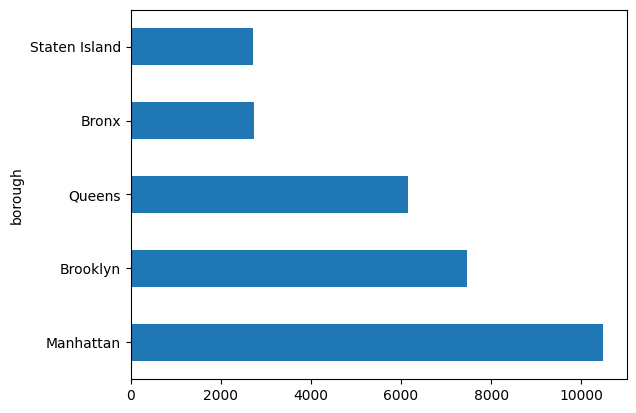

In [111]:
df_merged.value_counts('borough').plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [116]:
# read the population file
df_pop = pd.read_csv('boro_population.csv')

# merge the file with existing merged_data
df_merged_2 = df_merged.merge(df_pop, left_on='borough', right_on='borough', how='left')
df_merged_2.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Issued Date,License Expired Date,birth_year,age,neighborhood,zip,borough,monochrome,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,16,Upper West Side,10024.0,Manhattan,False,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,2014-09-20,2018-09-20,2013,10,Southeast Bronx,10461.0,Bronx,False,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12,2019-09-12,2014,9,Greenwich Village and Soho,10013.0,Manhattan,False,1644518.0,23.0
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12,2017-10-20,2008,15,Upper West Side,10025.0,Manhattan,False,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12,2019-09-12,2014,9,Greenwich Village and Soho,10013.0,Manhattan,False,1644518.0,23.0


In [130]:
dogs_per_capita = df_merged_2.value_counts('borough')/df_merged_2.groupby('borough')['population'].mean()
dogs_per_capita

borough
Bronx            0.001888
Brooklyn         0.002832
Manhattan        0.006371
Queens           0.002631
Staten Island    0.005746
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='borough,None'>

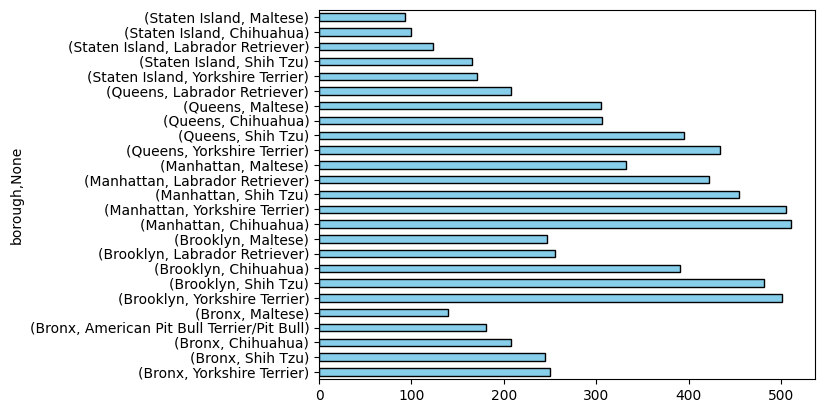

In [152]:
# I am assuming top 5 means by frequency

top_5= df_merged_2.groupby('borough')['Primary Breed'].apply(lambda x: x.value_counts().nlargest(5))

top_5.plot(kind='barh', x='Primary Breed', y='Count', color='skyblue', edgecolor='black')


## What percentage of dogs are not guard dogs?

In [154]:
# I am assuming you mean in every neighbourhood, otherwise its trivial and already done

df_merged_2.groupby('borough')['Guard or Trained'].apply(lambda x: x.value_counts(normalize=True).mul(100))


borough           
Bronx          No     100.000000
Brooklyn       No      99.892218
               Yes      0.107782
Manhattan      No      99.912980
               Yes      0.087020
Queens         No      99.952963
               Yes      0.047037
Staten Island  No      99.855491
               Yes      0.144509
Name: Guard or Trained, dtype: float64